In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "c:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\ProgramData\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\assma\AppData\Local\Temp\ipykernel_27940\2889966517.py", line 1, in <module>

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

Received a label value of 4 which is outside the valid range of [0, 4).  Label values: 1 3 4 4 3 2 3 4 1 4 2 4 3 2 3 3 0 4 4 2 1 4 4 4 0 4 3 4 3 2 3 2 2 1 3 0 1 1 3 3 4 1 3 3 3 1 2 4 4 4 2 4 2 4 1 4 4 4 4 4 3 3 4 2 2 1 3 2 3 0 2 3 2 2 3 4 2 3 3 2 3 3 3 1 2 4 1 1 4 3 2 1 1 4 1 3 4 3 0 3 2 0 4 1 1 4 2 4 1 3 2 3 4 1 2 2 4 4 2 2 3 3 0 3 0 2 4 4
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1055]

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "c:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\ProgramData\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "c:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\assma\AppData\Local\Temp\ipykernel_27940\1910290830.py", line 2, in <module>

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1895, in test_step

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

Received a label value of 4 which is outside the valid range of [0, 4).  Label values: 2 1 3 4 3 2 3 3 3 1 1 2 3 4 3 1 4 3 4 1 1 1 4 2 3 1 4 1 1 3 1 1 4 2 4 2 1 0 0 1 2 2 2 3 1 3 3 1 3 2 4 1 4 4 2 3 3 4 4 3 1 0 1 2 3 1 3 1 1 4 3 3 1 4 3 3 4 1 4 2 2 2 3 4 1 3 3 2 4 3 1 1 2 2 4 2 2 3 3 2 4 4 2 4 4 4 2 4 4 3 2 1 4 2 4 2 1 3 0 4 2 3 3 3 2 4 4 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_1234]

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 115ms/step
[0.9065212  0.09232322 0.00115551]
0


# Confusion matrix

8/8 [==============================] - 0s 2ms/step


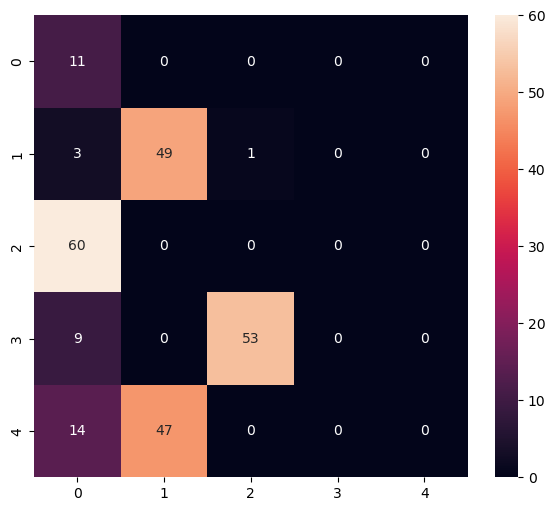

Classification Report
              precision    recall  f1-score   support

           0       0.11      1.00      0.20        11
           1       0.51      0.92      0.66        53
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        62
           4       0.00      0.00      0.00        61

    accuracy                           0.24       247
   macro avg       0.12      0.38      0.17       247
weighted avg       0.11      0.24      0.15       247



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\assma\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\assma\AppData\Local\Temp\tmp4xwfr0w1\assets


INFO:tensorflow:Assets written to: C:\Users\assma\AppData\Local\Temp\tmp4xwfr0w1\assets


6500

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.01 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9065212  0.09232327 0.00115551]
0
